In [1]:
import qsharp

In [ ]:
%%qsharp

import Microsoft.Quantum.Diagnostics.*;

operation Entangle_Same_value(isDebug: Bool) : (Result, Result) {
  // Allocate two qubits
  // Set state to |00⟩
  use (q_control, q_target) = (Qubit(), Qubit());

  // Put the control qubit into superposition
  // Set state to |0⟩ or |1⟩ with equal probability of 50%
  H(q_control);
  
  // Entangle the qubits using CNOT
  CNOT(q_control, q_target);

  if (isDebug) {
    DumpMachine();
  }

  // Measure both qubits
  let (m1, m2) = (M(q_control), M(q_target));

  if (isDebug) {
    Message($"Measurement results: q_control = {m1}, q_target = {m2}");
  }

  // The qubits must be reset before releasing them
  // Reset to |0⟩ state
  ResetAll([q_control, q_target]);

  return (m1, m2);
}

operation Entangle_Oposite_value(isDebug: Bool) : (Result, Result) {
  // Allocate two qubits
  // Set state to |00⟩
  use (q_control, q_target) = (Qubit(), Qubit());

  // Put the control qubit into superposition
  // Set state to |0⟩ or |1⟩ with equal probability of 50%
  H(q_control);
  
  // Apply X gate to the target qubit to flip its state
  // Set state to |1⟩
  X(q_target);

  // Entangle the qubits using CNOT
  CNOT(q_control, q_target);

  if (isDebug) {
    DumpMachine();
  }

  // Measure both qubits
  let (m1, m2) = (M(q_control), M(q_target));

  if (isDebug) {
    Message($"Measurement results: q_control = {m1}, q_target = {m2}");
  }

  // The qubits must be reset before releasing them
  // Reset to |0⟩ state
  ResetAll([q_control, q_target]);

  return (m1, m2);
}

In [3]:
%%qsharp
Entangle_Test(true);

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|00⟩</span>
  </td>
  <td>
    <span>0.7071+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="50.000000000000014"></progress>
    <span>50.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|11⟩</span>
  </td>
  <td>
    <span>0.7071+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="50.000000000000014"></progress>
    <span>50.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


$|\psi\rangle = \frac{\sqrt{2}}{2}|00\rangle+\frac{\sqrt{2}}{2}|11\rangle$

Measurement results: q_control = One, q_target = One

(One, One)

In [13]:
# Run Q# operations from Python

q_result = qsharp.run("Entangle_Test(false)", shots=100)

(Zero, Zero): 59
(One, One): 41


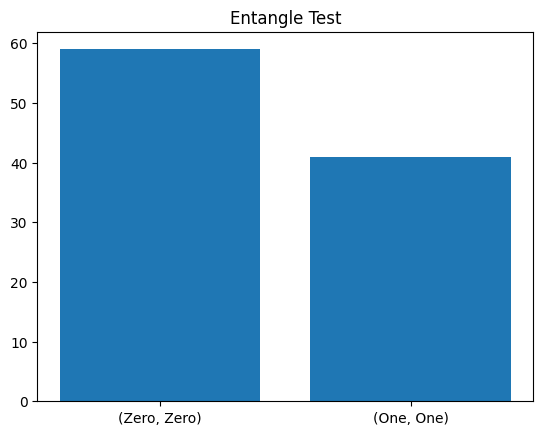

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

q_result.sort()
counts = Counter(q_result)

(values, counts) = counts.keys(), counts.values()

xlabes = np.arange(len(counts))

# for each label print the corresponding count
for (l, c) in zip(values, counts):
    print(f"{l}: {c}")

plt.title("Entangle Test")
plt.bar(xlabes, counts)
plt.xticks(xlabes, values)
plt.show()